In [34]:
import h5py
import seaborn as sns
import pandas 
import numpy as np
%matplotlib inline
from pylab import *
import re

In [35]:
args = {
    "fast5": "/home/ibis/gregor.sturm/nanopore/NanoporeData/PublicData/LomanLab_MAP-006/MAP006-1_downloads/",
    "out_basename": "/home/ibis/gregor.sturm/nanopore/own/notebooks/05_MAP006-basecaller/loman006"
}
# args = {
#     "fast5": "/home/ibis/gregor.sturm/nanopore/NanoporeData/SequencingRuns/NanoporeData/burnin_downloads/",
#     "out_basename": "/home/ibis/gregor.sturm/nanopore/own/notebooks/05_MAP006-basecaller/ibislambda"
# }
# args = {
#     "fast5": "/home/ibis/gregor.sturm/nanopore/NanoporeData/PublicData/david_eccles_bc_ideas/",
#     "out_basename": "/home/ibis/gregor.sturm/nanopore/own/notebooks/05_MAP006-basecaller/davidmouse"
# }

In [36]:
fast5path = !find {args["fast5"]} | grep fast5

In [38]:
stats = {
    "template": [],
    "pop1": [],
    "pop2": []
}
for file in fast5path:
    f5 = h5py.File(file, 'r')   
    try:
        log = f5['/Analyses/Basecall_2D_000/Log']
        log = bytes(log[...]).decode("utf-8").split("\n")
        model = [x for x in log if x.find(".model") >= 0]
        model = [re.search(r"\"(.*)\"", x).group(1) for x in model]
    except KeyError: 
        print("Error opening {0}".format(file))
        continue
        
    try: 
        _ = f5["/Analyses/Basecall_2D_000/BaseCalled_2D"]
    except KeyError:
        """no 2D data available"""
        continue
        
    for t in ["template", "complement"]: 
        m_name = [x for x in model if x.find(t) >= 0][0]
        events = pandas.DataFrame(np.array(f5['/Analyses/Basecall_2D_000/BaseCalled_{0}/Events'.format(t)]))
        if m_name.find("pop1") >= 0: 
            k = "pop1"
        elif m_name.find("pop2") >= 0:
            k = "pop2"
        else: 
            k = t
        stats[k].append(events["mean"].median())

Error opening /home/ibis/gregor.sturm/nanopore/NanoporeData/PublicData/LomanLab_MAP-006/MAP006-1_downloads/pass/LomanLabz_PC_Ecoli_K12_MG1655_20150924_MAP006_1_5005_1_ch375_file106_strand.fast5


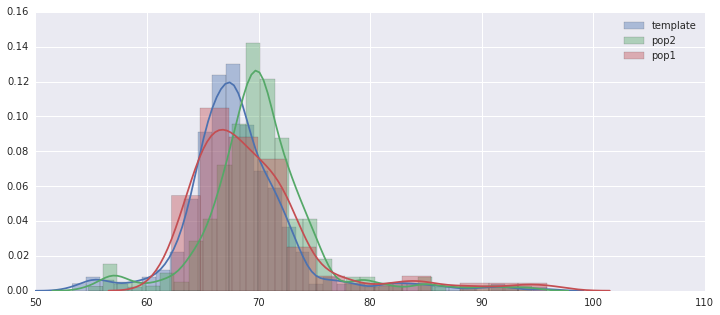

In [42]:
fig, ax = subplots(figsize=(12,5))
for t, stat in stats.items(): 
    sns.distplot(stat, label=t)
ax.legend()
ax.minorticks_on()

In [46]:
print(np.mean(stats["template"]))
print(np.median(stats["template"]))

68.3063196798
67.6872079779
